# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [48]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [49]:
# Build the query URL requestig the results in Fahrenheit
query_url = f'http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID={api_key}&q=city'

# Get Weather Data
response = requests.get(query_url).json()
response

{'coord': {'lon': 149.13, 'lat': -35.28},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 66.63,
  'pressure': 1015,
  'humidity': 34,
  'temp_min': 66,
  'temp_max': 68},
 'visibility': 10000,
 'wind': {'speed': 10.29, 'deg': 350},
 'clouds': {'all': 40},
 'dt': 1567482892,
 'sys': {'type': 1,
  'id': 9588,
  'message': 0.0081,
  'country': 'AU',
  'sunrise': 1567455689,
  'sunset': 1567496711},
 'timezone': 36000,
 'id': 2172517,
 'name': 'City',
 'cod': 200}

In [63]:
# Get cloudiness percentage from JSON response
cloudiness = response['clouds']['all']
cloudiness

40

In [64]:
# Get humidity percentage from JSON response
humidity = response['main']['humidity']
humidity

34

In [65]:
# Get max temperature from JSON response
max_temp = response["main"]["temp_max"]
max_temp

68

In [66]:
# Get wind speed from JSON response
wind = response['wind']['speed']
wind

10.29

In [5]:
# Set lists to hold the data
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind = []
new_cities = []

# Counters
record_counter = 0
set_counter = 0

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
    
    # Append responses into its respective empty list     
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found. Skipping...")
        pass
    
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 0 | ponta do sol
Processing Record 2 of Set 0 | paamiut
Processing Record 3 of Set 0 | sao filipe
Processing Record 4 of Set 0 | kaseda
Processing Record 5 of Set 0 | grand gaube
Processing Record 6 of Set 0 | mataura
Processing Record 7 of Set 0 | cabra
Processing Record 8 of Set 0 | faxinal
Processing Record 9 of Set 0 | albany
Processing Record 10 of Set 0 | castro
Processing Record 11 of Set 0 | chuy
Processing Record 12 of Set 0 | taoudenni
Processing Record 13 of Set 0 | san quintin
Processing Record 14 of Set 0 | upernavik
Processing Record 15 of Set 0 | xuddur
Processing Record 16 of Set 0 | hobart
Processing Record 17 of Set 0 | cidreira
Processing Record 18 of Set 0 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 0 | hilo
Processing Record 20 of Set 0 | khatanga
Processing Record 21 of Set 0 | kahului
Processing Record 22 of Set 0 | pisco
Processing Record 23 of Set 0 | busselton


Processing Record 34 of Set 3 | atbasar
Processing Record 35 of Set 3 | minbu
Processing Record 36 of Set 3 | hualmay
Processing Record 37 of Set 3 | comodoro rivadavia
Processing Record 38 of Set 3 | east london
Processing Record 39 of Set 3 | galesong
Processing Record 40 of Set 3 | pinhao
Processing Record 41 of Set 3 | quatre cocos
Processing Record 42 of Set 3 | dikson
Processing Record 43 of Set 3 | dabat
Processing Record 44 of Set 3 | portland
Processing Record 45 of Set 3 | nemuro
Processing Record 46 of Set 3 | cayenne
Processing Record 47 of Set 3 | brownsville
Processing Record 48 of Set 3 | paulista
Processing Record 49 of Set 3 | bud
Processing Record 50 of Set 3 | cape town
Processing Record 0 of Set 4 | conceicao do mato dentro
Processing Record 1 of Set 4 | coihaique
Processing Record 2 of Set 4 | salisbury
Processing Record 3 of Set 4 | soyo
Processing Record 4 of Set 4 | flinders
Processing Record 5 of Set 4 | nongan
Processing Record 6 of Set 4 | palmer
Processing R

Processing Record 19 of Set 7 | mananara
City not found. Skipping...
Processing Record 20 of Set 7 | rio gallegos
Processing Record 21 of Set 7 | winslow
Processing Record 22 of Set 7 | catuday
Processing Record 23 of Set 7 | tubuala
Processing Record 24 of Set 7 | takoradi
Processing Record 25 of Set 7 | lathi
Processing Record 26 of Set 7 | saint-pierre
Processing Record 27 of Set 7 | oistins
Processing Record 28 of Set 7 | macaboboni
City not found. Skipping...
Processing Record 29 of Set 7 | krasnoselkup
City not found. Skipping...
Processing Record 30 of Set 7 | badarpur
Processing Record 31 of Set 7 | inirida
Processing Record 32 of Set 7 | te anau
Processing Record 33 of Set 7 | tiznit
Processing Record 34 of Set 7 | digha
Processing Record 35 of Set 7 | saskylakh
Processing Record 36 of Set 7 | xining
Processing Record 37 of Set 7 | sibolga
Processing Record 38 of Set 7 | guerrero negro
Processing Record 39 of Set 7 | alwar
Processing Record 40 of Set 7 | kismayo
City not found

Processing Record 0 of Set 11 | presidencia roque saenz pena
Processing Record 1 of Set 11 | bereda
Processing Record 2 of Set 11 | ossora
Processing Record 3 of Set 11 | warqla
City not found. Skipping...
Processing Record 4 of Set 11 | kisangani
Processing Record 5 of Set 11 | tayoltita
Processing Record 6 of Set 11 | verkhnyaya inta
Processing Record 7 of Set 11 | celestun
Processing Record 8 of Set 11 | layou
City not found. Skipping...
Processing Record 9 of Set 11 | freetown
Processing Record 10 of Set 11 | umm lajj
Processing Record 11 of Set 11 | grande-riviere
City not found. Skipping...
Processing Record 12 of Set 11 | dudinka
Processing Record 13 of Set 11 | selishche
City not found. Skipping...
Processing Record 14 of Set 11 | asasa
Processing Record 15 of Set 11 | mapastepec
Processing Record 16 of Set 11 | novobirilyussy
Processing Record 17 of Set 11 | progreso
Processing Record 18 of Set 11 | rawson
Processing Record 19 of Set 11 | myitkyina
Processing Record 20 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create City list DataFrame
city_dict = {"City": cities}
city_df = pd.DataFrame(city_dict)

# Export list of cities to csv
city_df.to_csv("Data/cities.csv", encoding="utf-8", index=False)
city_df.head()

,City
0,ponta do sol
1,paamiut
2,sao filipe
3,kaseda
4,grand gaube


In [11]:
# Create Weather DataFrame with collected data
weather_dict = {
    "City" : new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country ,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat, 
    "Lng" : lng,
    "Max Temp" : temp, 
    "Wind Speed" : wind}

weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64

In [51]:
# Export Weather Data to csv
weather_df.to_csv("Data/weather.csv", encoding="utf-8", index=False)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ponta do sol,10,BR,1567476054,59,-20.63,-46.00,69.11,2.04
1,paamiut,100,GL,1567476055,79,61.99,-49.67,43.55,21.70
2,sao filipe,74,CV,1567476055,86,14.90,-24.50,80.63,12.93
3,kaseda,75,JP,1567476055,74,31.42,130.32,84.20,6.93
4,grand gaube,75,MU,1567475990,82,-20.01,57.66,69.01,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [70]:
# Convert UTC code to a date format
# Set list to store converted date
converted_date = [] 

# Use for loop to append date conversion to converted_date list
for day in date:
    converted_date.append(
    datetime.datetime.fromtimestamp(int(day)).strftime('%m/%d/%Y'))

# Display the first converted date
converted_date[0:1]

['09/02/2019']

#### Latitude vs. Temperature Plot

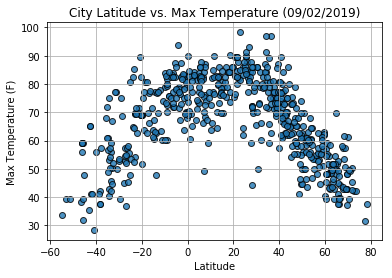

In [74]:
# Latitude vs Temperature Plot
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], edgecolor='black', linewidths=1, alpha=0.8)
plt.title(f'City Latitude vs. Max Temperature ({converted_date[0]})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('Images/latitude_vs_temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

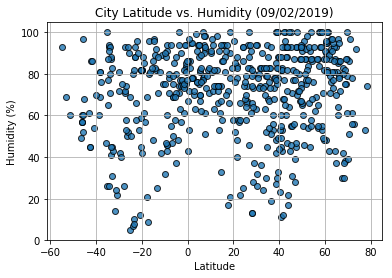

In [75]:
# Latitude vs Humidity Plot
plt.scatter(weather_df['Lat'], weather_df['Humidity'], edgecolor='black', linewidths=1, alpha=0.8)
plt.title(f'City Latitude vs. Humidity ({converted_date[0]})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('Images/latitude_vs_humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

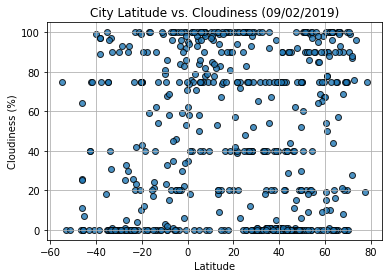

In [77]:
# Latitude vs Cloudiness Plot
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], edgecolor='black', linewidths=1, alpha=0.8)
plt.title(f'City Latitude vs. Cloudiness ({converted_date[0]})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('Images/latitude_vs_cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

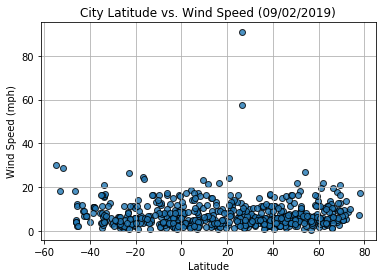

In [79]:
# Latitude vs Wind Speed Plot
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], edgecolor='black', linewidths=1, alpha=0.8)
plt.title(f'City Latitude vs. Wind Speed ({converted_date[0]})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('Images/latitude_vs_wind.png')
plt.show()